In [ ]:
#Data source:
#https://www.kaggle.com/orgesleka/used-cars-database

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.float_format', '{:.2f}'.format)

<h2>Loading data</h2>

In [2]:
cars = pd.read_csv('../input/used-cars-database/autos.csv', encoding='cp1252')

<h2>First look</h2>

In [3]:
cars.head()

,Unnamed: 0,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,150000,0,benzin,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,125000,5,diesel,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,125000,8,diesel,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,150000,6,benzin,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,90000,7,diesel,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#Object columns
cars.describe(include = 'object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,fuelType,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,338142,299468,371528,371528
unique,280500,233531,2,2,2,8,2,7,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,benzin,nein,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,657,371525,371516,192585,95894,274214,223857,263182,14450,17


In [5]:
#Numeric columns
cars.describe()

,Unnamed: 0,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.00,371528.00,371528.00,371528.00,371528.00,371528.00,371528.00,371528.00
mean,185763.50,17295.14,2004.58,115.55,125618.69,5.73,0.00,50820.67
std,107251.04,3587953.74,92.87,192.14,40112.34,3.71,0.00,25799.08
min,0.00,0.00,1000.00,0.00,5000.00,0.00,0.00,1067.00
25%,92881.75,1150.00,1999.00,70.00,125000.00,3.00,0.00,30459.00
50%,185763.50,2950.00,2003.00,105.00,150000.00,6.00,0.00,49610.00
75%,278645.25,7200.00,2008.00,150.00,150000.00,9.00,0.00,71546.00
max,371527.00,2147483647.00,9999.00,20000.00,150000.00,12.00,0.00,99998.00


In [6]:
cars.dtypes

Unnamed: 0              int64
dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
kilometer               int64
monthOfRegistration     int64
fuelType               object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

<h2>Data cleaning</h2>

In [7]:
cars_clean = cars[(cars['powerPS']<600)
                 & (cars['powerPS']>40)
                 & (cars['price']>100)
                 & (cars['price']<150000)
                 & (cars['yearOfRegistration']>1980)
                 & (cars['yearOfRegistration']<=2016)
                 & (cars['offerType']=='Angebot')
                 & (cars['seller']=='privat')]

print("Dropped {} % of rows".format(100 - round(cars_clean.shape[0] * 100 / cars.shape[0], 2)))

Dropped 17.42 % of rows


In [8]:
#Irrelevant columns
cars_clean = cars_clean.drop('Unnamed: 0', axis = 1)
cars_clean = cars_clean.drop('dateCrawled', axis = 1)
cars_clean = cars_clean.drop('dateCreated', axis = 1)
cars_clean = cars_clean.drop('lastSeen', axis = 1)
cars_clean = cars_clean.drop('nrOfPictures', axis = 1)
cars_clean = cars_clean.drop('monthOfRegistration', axis = 1)
cars_clean = cars_clean.drop('postalCode', axis = 1)

In [9]:
#Transforming 'yearOfRegistration' to 'age'
cars_clean['age'] = 2016-cars_clean['yearOfRegistration']

<h2>Plots</h2>

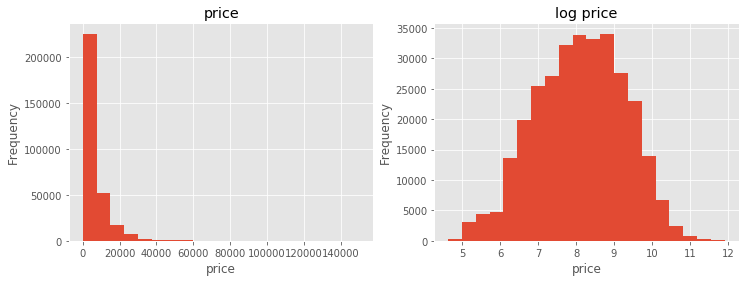

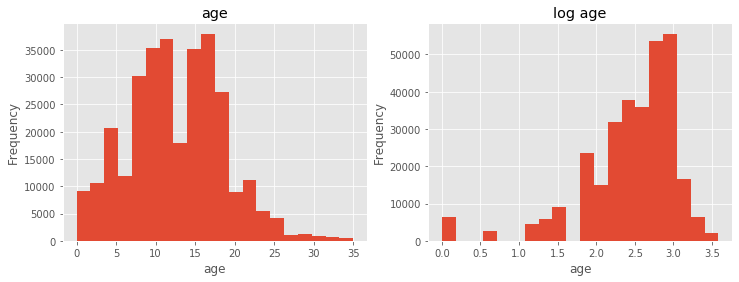

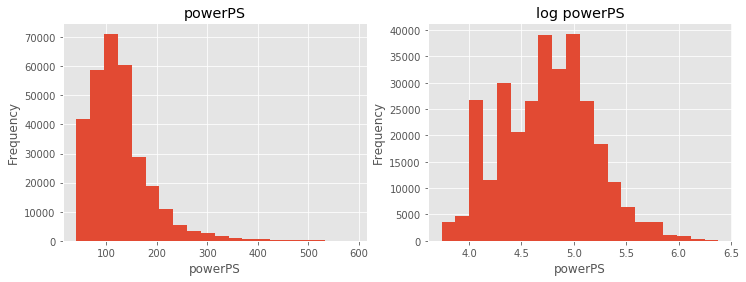

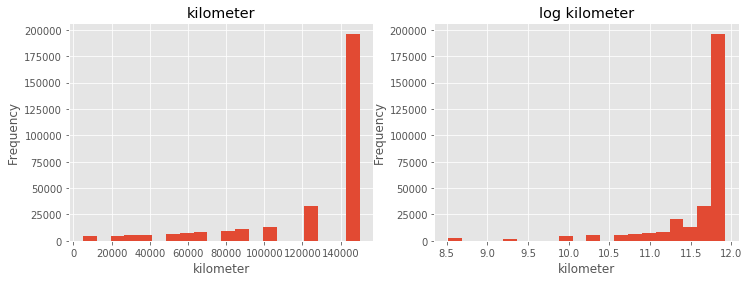

In [10]:
#Numeric features histograms normal vs. log
num = ['price', 'powerPS', 'age', 'kilometer']

for col in num:
    fig, [ax1, ax2] = plt.subplots(1,2, figsize = (12,4))
    ax1.hist(cars_clean[col], bins = 20)
    ax2.hist(np.log(cars_clean[col]+1), bins = 20)
    ax1.set_xlabel(col)
    ax2.set_xlabel(col)
    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Frequency')
    ax1.set_title(col)
    ax2.set_title('log ' + col)
    plt.show()

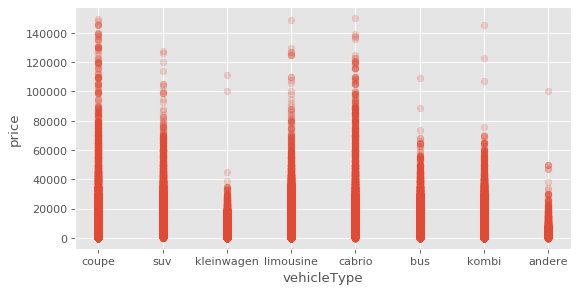

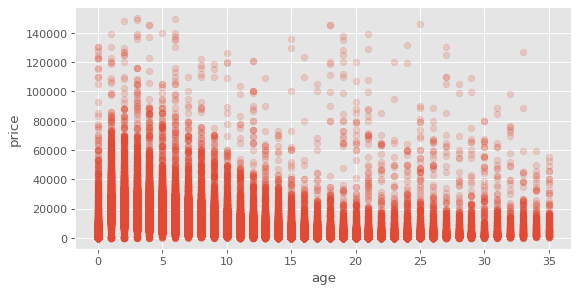

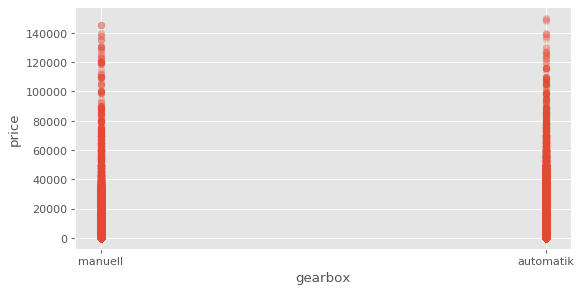

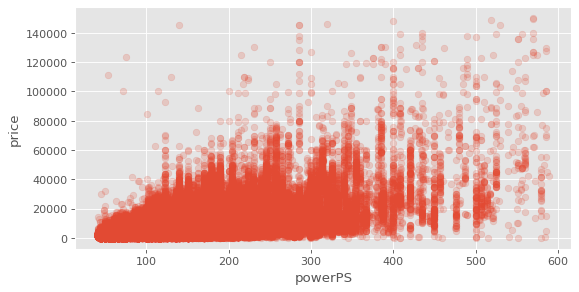

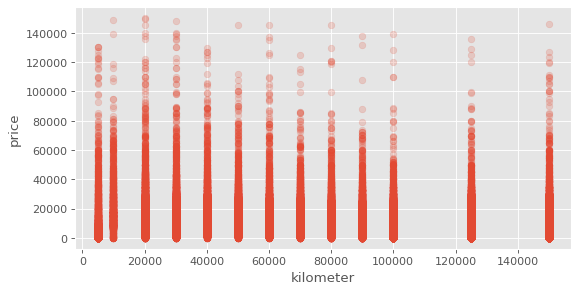

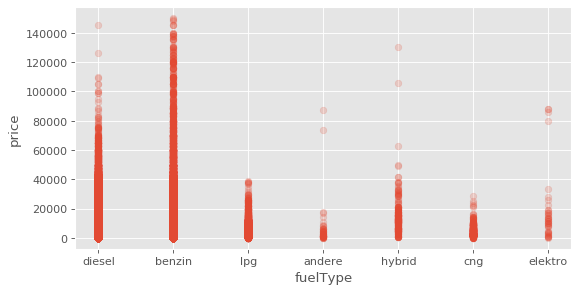

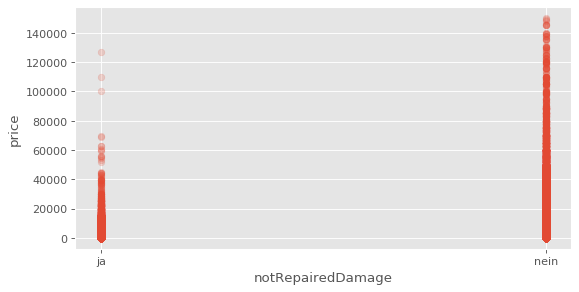

In [11]:
#Scatter plot all variable vs. price
target_name = 'price'
feature_names = ['vehicleType', 'age', 'gearbox', 'powerPS', 'kilometer', 'fuelType', 'notRepairedDamage']

for col in feature_names:
    data = cars_clean[[col, target_name]].dropna()
    fig, ax = plt.subplots(figsize=(8,4), dpi=80)
    ax.scatter(data[col], data[target_name], alpha = 0.2)
    plt.xlabel(col)
    plt.ylabel(target_name)
    plt.show()

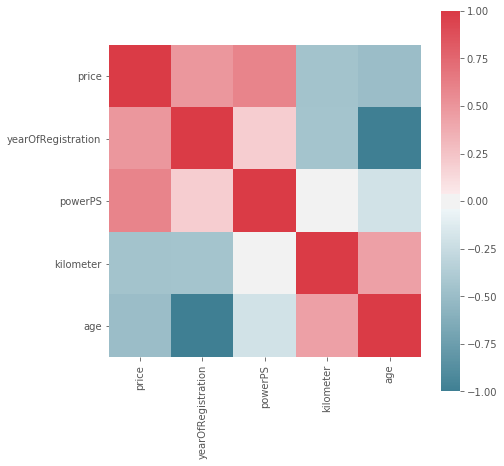

,price,yearOfRegistration,powerPS,kilometer,age
price,1.00,0.50,0.60,-0.45,-0.50


In [12]:
#Correlation matrix
f, ax = plt.subplots(figsize=(7, 7))
corr = cars_clean.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

cars_clean.corr()[0:1]

<h2>Feature engineering</h2>

In [6]:
#Loading top 100 cars in 2016 https://www.kfz-auskunft.de/kfz/zulassungszahlen_2012_3.html
car_models = pd.read_csv('https://raw.githubusercontent.com/exoflow/PredictingUsedCarPrices/master/car_models.csv')

In [7]:
car_models

,manufacturer,model
0,VW,Golf
1,VW,Polo
2,VW,Passat
3,VW,Tiguan
4,Opel,Astra
...,...,...
95,Porsche,Cayenne
96,Fiat,Ducato
97,Toyota,RAV
98,BMW,X5


In [15]:
#Adding 'manufacturer' and 'model' columns with default value 'Unknown'
cars_clean['manufacturer'] = 'Unknown'
cars_clean['model'] = 'Unknown'
          
    
def check_manufacturer(name):
    for man in car_models['manufacturer'].unique():        
        if man.lower() in name.lower():
            return man
    return 'Unknown'


def check_model(name, manufacturer):    
    if manufacturer == 'Unknown': #Unknown manufacturer --> check all models
        for mod in car_models['model'].unique():        
            if mod.lower() in name.lower():
                return mod
    
    else: #Known manufacturer --> check only models from this manufacturer
        for mod in car_models[car_models['manufacturer']==manufacturer]['model'].unique():        
            if mod.lower() in name.lower():
                return mod
    return 'Unknown'

            
def lookup_manufacturer(model):
    if model in car_models['model'].unique():   
        return car_models[car_models['model']==str(model)]['manufacturer'].unique()[0]
    else:
        return 'Unknown'
 
#Replacing some names for better matching
cars_clean['name'] = cars_clean['name'].str.replace('Volkswagen','VW')
cars_clean['name'] = cars_clean['name'].str.replace('Citroën','Citroen')

#Manufacturer and model based on name
cars_clean['manufacturer'] = cars_clean['name'].apply(lambda name: check_manufacturer(name))
cars_clean['model'] = cars_clean[['name','manufacturer']].apply(lambda df: check_model(df['name'], df['manufacturer']), axis = 1)

#Manufacturer based on model
cars_clean['manufacturer'] = np.where((cars_clean['manufacturer']=='Unknown') & (cars_clean['model']!='Unknown'), cars_clean['model'].apply(lambda model: lookup_manufacturer(model)), cars_clean['manufacturer'])

In [16]:
cars_clean[['name', 'manufacturer', 'model']]

,name,manufacturer,model
1,A5_Sportback_2.7_Tdi,Audi,A5
2,"Jeep_Grand_Cherokee_""Overland""",Unknown,Unknown
3,GOLF_4_1_4__3TÜRER,VW,Golf
4,Skoda_Fabia_1.4_TDI_PD_Classic,Skoda,Fabia
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,BMW,Unknown
...,...,...,...
371520,turbo_defekt,Unknown,Unknown
371524,Smart_smart_leistungssteigerung_100ps,Smart,Unknown
371525,VW_Multivan_T4_TDI_7DC_UY2,VW,Unknown
371526,VW_Golf_Kombi_1_9l_TDI,VW,Golf


<h2>Prediction</h2>

In [17]:
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.compose import *
from sklearn_pandas import DataFrameMapper

In [18]:
#Numeric features to object using qcut
cars_clean['kilometer_qcut'] = cars_clean['kilometer'].astype('object') 
cars_clean['age_qcut'] = pd.qcut(cars_clean['age'],15).astype('object')
cars_clean['powerPS_qcut'] = pd.qcut(cars_clean['powerPS'],15).astype('object')

#Log powerPS
cars_clean['log_powerPS'] = np.log(cars_clean['powerPS'])

In [19]:
#Target
target = cars_clean['price']

#Numeric features
num_features = cars_clean[['age','log_powerPS', 'kilometer']]

#Object features
obj_features = cars_clean[['gearbox','vehicleType','fuelType','notRepairedDamage','kilometer_qcut','age_qcut','powerPS_qcut','manufacturer','model']]

#Binary object features
obj_features_dummies = pd.get_dummies(obj_features)

#Final features
features = pd.concat([num_features, obj_features_dummies], axis = 1)
print("Shape:",features.shape)

#Model for quick iterations
lin_reg = LinearRegression()
cv = cross_val_score(lin_reg, features, np.log(target), cv=10)
print("LinearRegression:",np.mean(cv))

Shape: (306809, 179)
LinearRegression: 0.8280231849795389


In [20]:
#Comparing different models
lin_reg = LinearRegression()
cv = cross_val_score(lin_reg, features, np.log(target), cv=4)
print("LinearRegression:",np.mean(cv))

lasso_reg = Lasso(alpha=0.001, max_iter = 10000)
cv = cross_val_score(lasso_reg, features, np.log(target), cv=4)
print("Lasso:",np.mean(cv))

ridge_reg = Ridge(alpha=1, max_iter = 10000)
cv = cross_val_score(ridge_reg, features, np.log(target), cv=4)
print("Ridge:",np.mean(cv))

rand_reg = RandomForestRegressor()
cv = cross_val_score(rand_reg, features, np.log(target), cv=4)
print("RandomForestRegressor:",np.mean(cv))

#LinearRegression: 0.8280162755000906
#Lasso: 0.8165666671904563
#Ridge: 0.8280168215440299
#RandomForestRegressor: 0.865854142989809

LinearRegression: 0.8280162755000906
Lasso: 0.8165666671904563
Ridge: 0.8280168215440299
RandomForestRegressor: 0.865854142989809


In [21]:
#Example plot using RandomForestRegressor

#Train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=2)

#Model training and prediction
rand_reg = RandomForestRegressor()
rand_reg.fit(X_train,np.log(y_train))
y_pred = np.exp(rand_reg.predict(X_test))

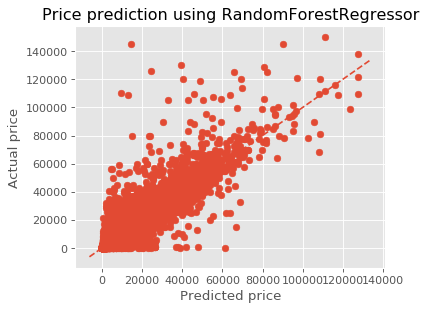

R2 score: 0.87


In [22]:
#Function for a,b line
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


#Plotting y_pred, y_test
fig, ax = plt.subplots(figsize=(5,4), dpi=80)
ax.scatter(y_pred, y_test)
plt.title('Price prediction using RandomForestRegressor')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
abline(1,0)
plt.show()

print("R2 score:",round(r2_score(y_pred, y_test),2))

<h2> Frequency of car manufacturers and models </h2>

In [23]:
cars_plot = cars_clean.copy()

#Clean some "obvious" issues 
cars_plot['name'] = cars_plot['name'].str.replace('zu_','')
cars_plot['name'] = cars_plot['name'].str.replace('Verkaufe_','')
cars_plot['name'] = cars_plot['name'].str.replace('Mercedes_Benz','Mercedes Benz')

In [24]:
#Still using the normalization from car_models.csv from above but filling more unknowns now 
#Manufacturer based on name string split
cars_plot['manufacturer'] = np.where((cars_plot['manufacturer']=='Unknown'), 
                                      cars_plot['name'].apply(lambda x: x.split('_')[0]), 
                                      cars_plot['manufacturer'])

#Model based on name string split
cars_plot['model'] = np.where((cars_plot['model']=='Unknown'), 
                               cars_plot['name'].apply(lambda x: x.split('_')[1] if len(x.split('_')) >= 2 else 'Unknown'), 
                               cars_plot['model'])

In [25]:
#Top 25 manufacturers and models
top_man = cars_plot.groupby('manufacturer').size().sort_values(ascending = False).head(25).reset_index()['manufacturer'].unique()
top_mod = cars_plot.groupby('model').size().sort_values(ascending = False).head(25).reset_index()['model'].unique()

#Column with top 25 or 'Other' for nicer plotting
cars_plot['manufacturer_grouped'] = cars_plot['manufacturer'].apply(lambda man: man if man in top_man else 'Other')
cars_plot['model_grouped'] = cars_plot['model'].apply(lambda mod: mod if mod in top_mod else 'Other')

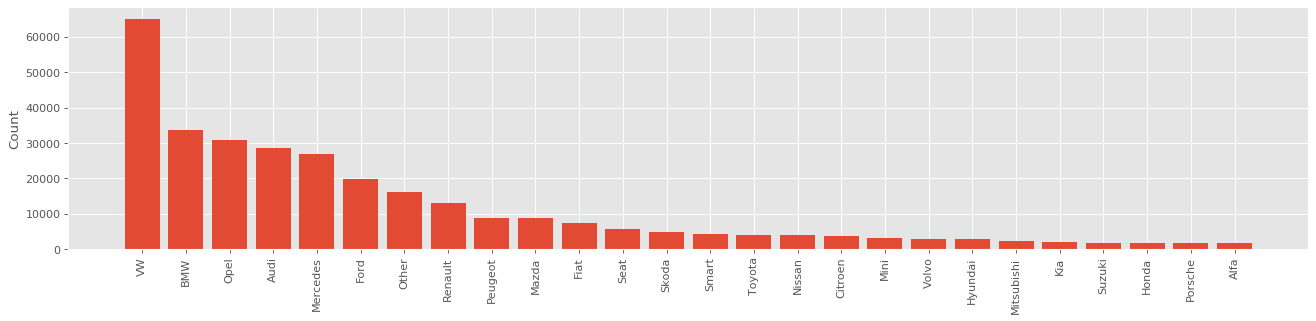

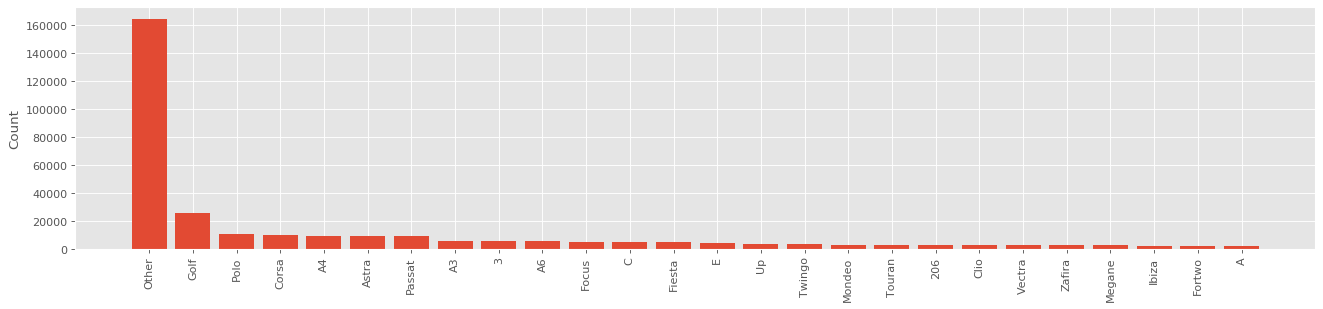

In [26]:
#Plotting
for col in ['manufacturer_grouped', 'model_grouped']:
    data = cars_plot.groupby(col).size().sort_values(ascending = False).reset_index()
    fig, ax = plt.subplots(figsize=(20,4), dpi=80)
    ax.bar(data[col], data[0])
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()